In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


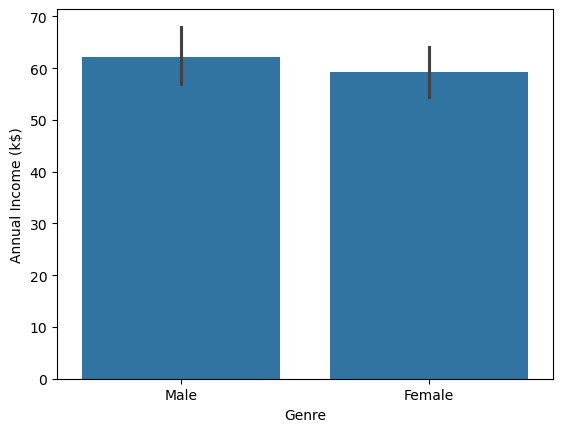

In [4]:
sns.barplot(x="Genre",y="Annual Income (k$)",data=df)
plt.show()

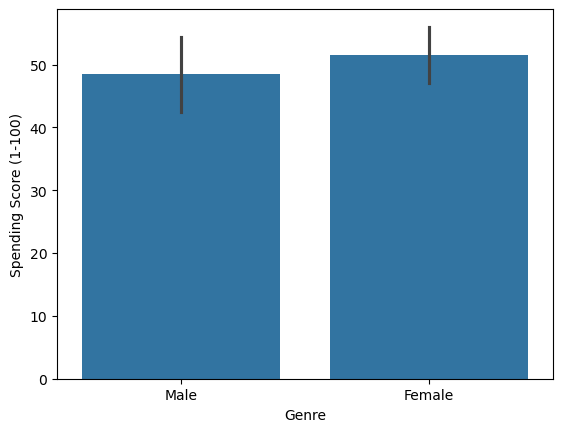

In [5]:
sns.barplot(x="Genre",y="Spending Score (1-100)",data=df)
plt.show()

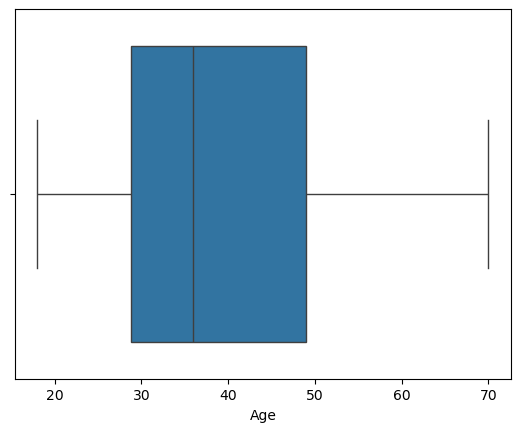

In [6]:
sns.boxplot(x=df['Age'])
plt.show()

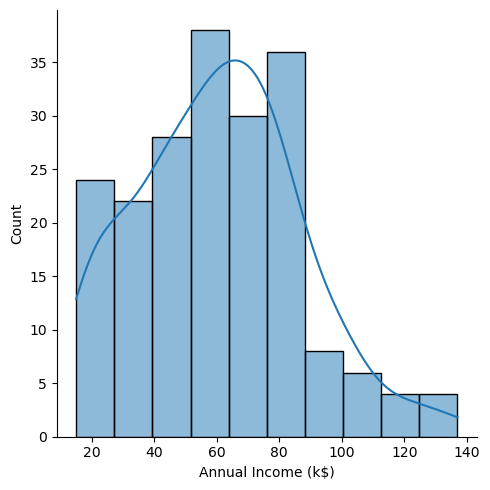

In [7]:
sns.displot(df['Annual Income (k$)'],kde=True)
plt.show()

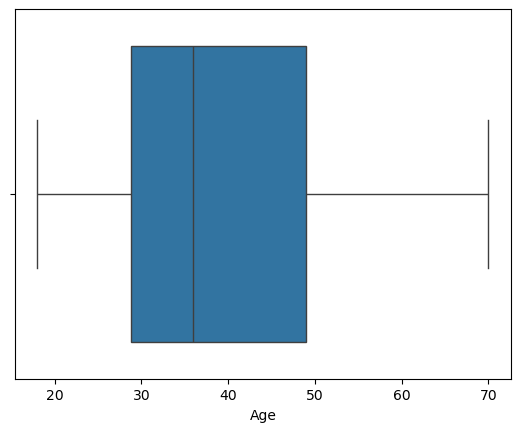

In [8]:
sns.boxplot(x=df['Age'])
plt.show()


In [9]:
from sklearn.cluster import KMeans

In [68]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]].values

In [70]:
x.shape

(200, 2)

In [72]:
#k= no of cluster(hyperparameter)

In [74]:
#Elbow Method
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
    

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

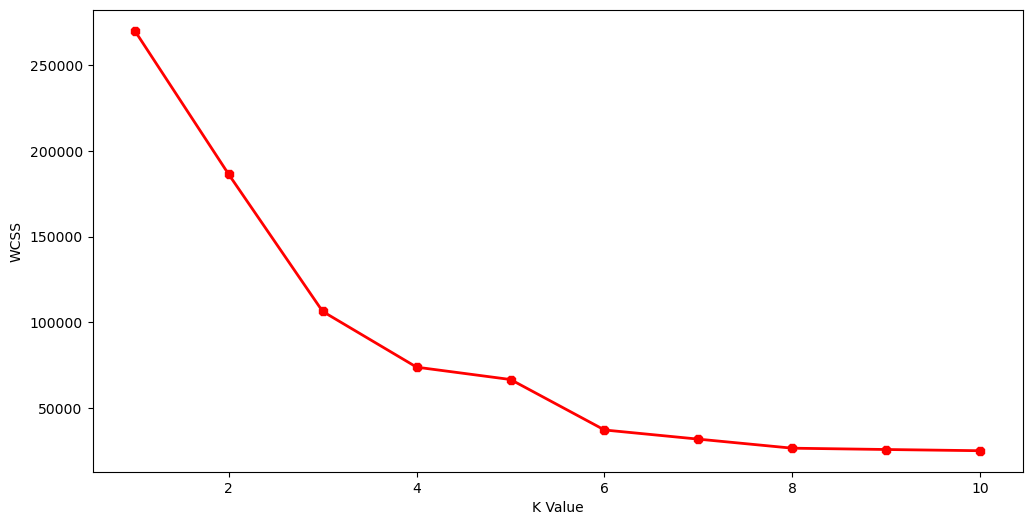

In [75]:
#The elbow curve
plt.figure(figsize=(12,6))
#plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
#plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [76]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)

In [77]:
#fitting the input data
km1.fit(x)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [78]:
km1.inertia_

44448.4554479337

In [79]:
#predicting the labels of the input data
y=km1.predict(x)

In [81]:
#adding the labels to a column named label
df["label"]=y

In [84]:
#the new dataframe with the clustering done
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


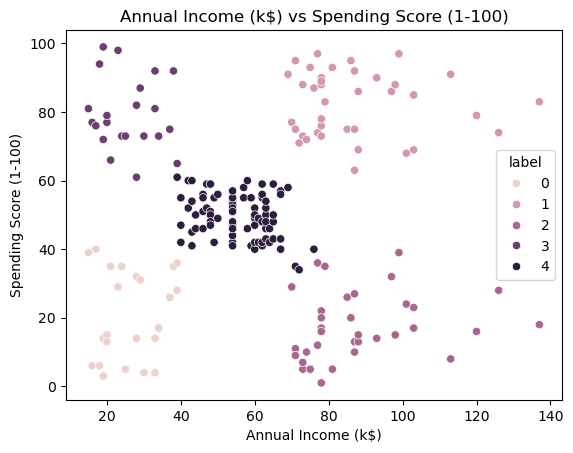

In [91]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='label',data=df)
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

In [93]:
from sklearn.metrics import silhouette_score

In [95]:
score=silhouette_score(x,y)

In [97]:
score

0.553931997444648